In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [4]:
df["rank"].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [5]:
df["discipline"].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [6]:
df["sex"].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['rank']= label_encoder.fit_transform(df['rank'])
df['discipline']= label_encoder.fit_transform(df['discipline'])
df['sex']= label_encoder.fit_transform(df['sex'])

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


<AxesSubplot:>

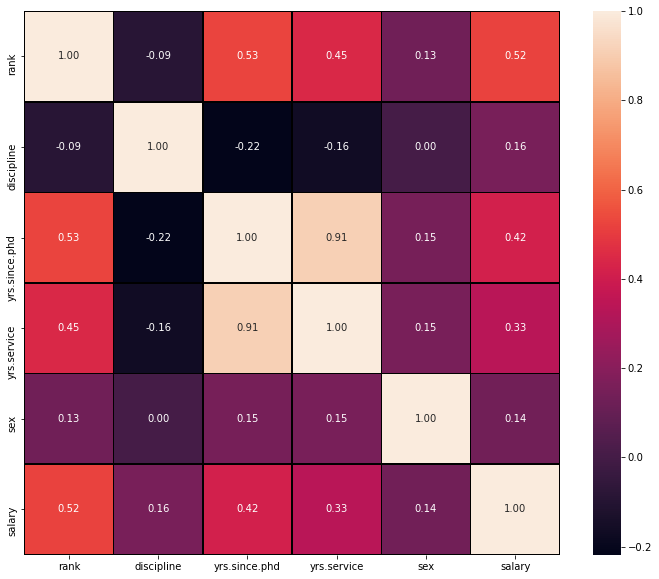

In [10]:
cm = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

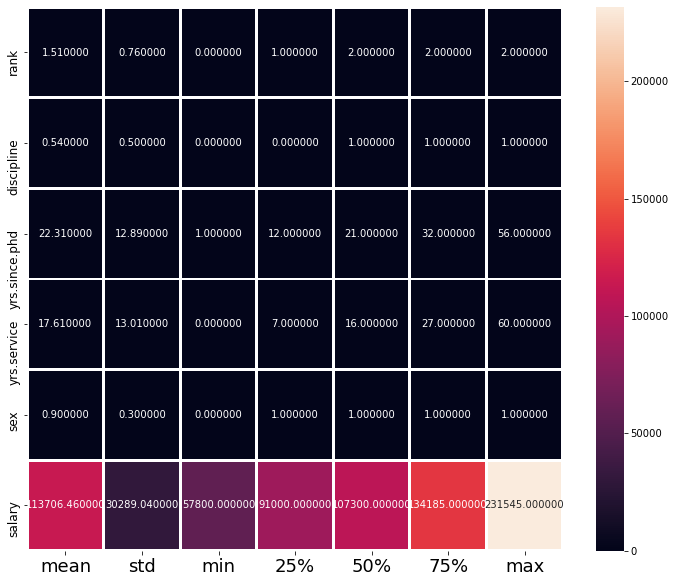

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot = True, linewidth = 2, fmt = 'f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

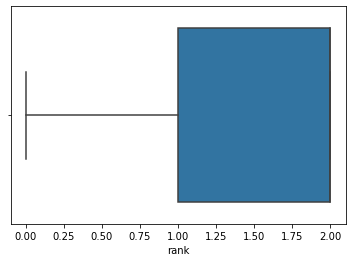

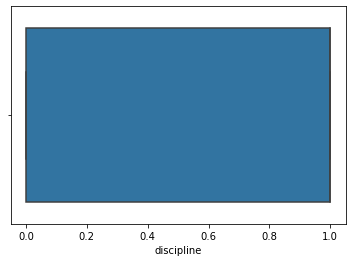

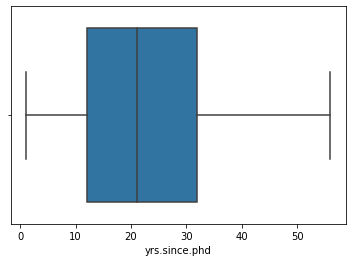

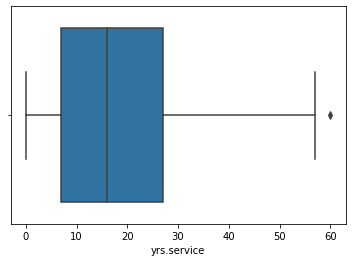

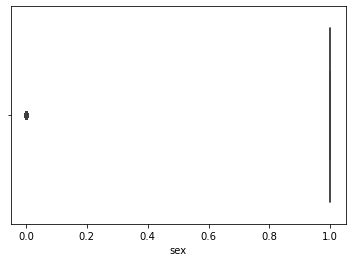

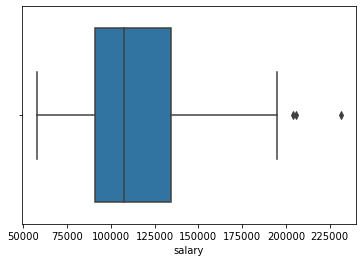

In [16]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [18]:
threshold = 3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [19]:
df_new = df[(z<3).all(axis=1)]

In [20]:
df_new.shape

(354, 6)

In [21]:
x = df_new.drop(["salary"],axis=1)

In [24]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [25]:
y=df_new["salary"]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
predict = lm.predict(x_test)
predict


array([120001.95716111, 124507.23361645,  84739.41082275, 128869.33941354,
       132783.65575157,  89731.37435563, 120510.62979896, 130920.74404106,
        99506.76962985, 113635.33240344, 103939.67905197,  88040.41249356,
       123633.058999  , 125344.4430132 ,  78371.2226569 , 112385.73536015,
       107693.52939598,  86460.71528319, 114107.03982059, 120581.433424  ,
       124177.13344937,  87055.17120647, 117007.13769928, 139055.55892611,
        84409.31065567, 103574.17707237, 110841.4399623 , 108790.03533478,
       113430.29641786, 121241.63375816, 120697.55930779,  89832.52057904,
       116158.44444811, 100166.96996401, 104416.24770121, 133773.95625281,
       121357.75964195, 121607.13573776,  79727.02513774,  81743.02795274,
       135789.95906782, 101888.27442445, 121607.13573776, 139572.58860201,
       115686.73703096,  99836.86979693,  85765.11313651,  83749.11032151,
        86755.41363776,  75659.61769521, 115533.64592647, 115356.63686388,
       123562.25537396,  

In [31]:
lm.score(x_train,y_train)

0.3509618022959461